Image shift: 2.9424 0.0921


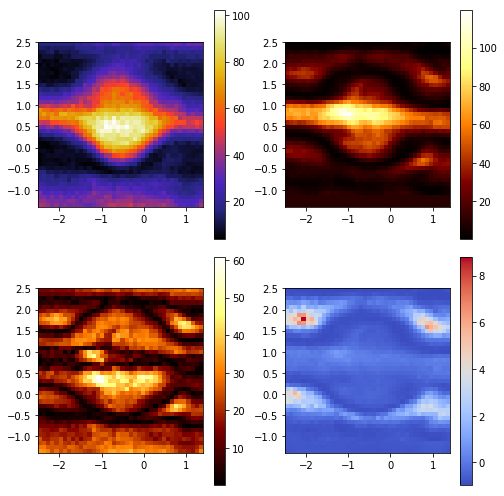

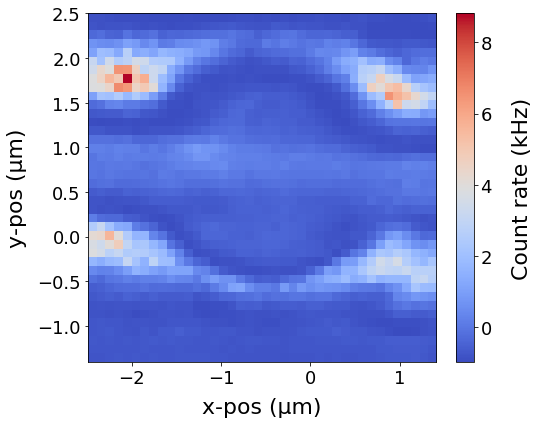

In [10]:
import sys
sys.path.append("..")
%matplotlib inline
import numpy as np
import imreg_dft as ird
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import get_work_dir, prettify_2d_plot

data_path = r"C:\data"
date = '190807'
idx1, idx2 = '09', '20'

filename1 = r'%s\%s\FSM-2D\%sFSM%s FSM-2D' % (data_path, date, date, idx1)
filename2 = r'%s\%s\FSM-2D\%sFSM%s FSM-2D' % (data_path, date, date, idx2)
x = np.loadtxt(filename1 + " X.dat")
y = np.loadtxt(filename1 + " Y.dat")
z1 = np.loadtxt(filename1 + " Z.dat")
z2 = np.loadtxt(filename2 + " Z.dat")

# image re-alignment
trans = ird.translation(z1, z2)
tvec = trans["tvec"].round(4)
print("Image shift:", *tvec)
z2 = ird.transform_img(z2, tvec=tvec)

z_diff = (z2 - z1)
z_abs = np.abs(z_diff)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))
# use afmhot for positive maps (abs or **2)
# use coolwarm for - and + plot (raw differential plot)
extent = (np.min(x), np.max(x), np.min(y), np.max(y))
cp1 = ax1.imshow(z1, cmap='CMRmap', origin='center', extent=extent)
cp2 = ax2.imshow(z2, cmap='afmhot', origin='center', extent=extent)
cp3 = ax3.imshow(z_abs, cmap='afmhot', origin='center', extent=extent)

val_min=-0.1
val_max=0.25
cp4 = ax4.imshow(z_diff/z1, cmap='coolwarm', origin='center', extent=extent)#, vmin=val_min, vmax=val_max)
cb1 = plt.colorbar(cp1, ax=ax1)
cb2 = plt.colorbar(cp2, ax=ax2)
cb3 = plt.colorbar(cp3, ax=ax3)
cb4 = plt.colorbar(cp4, ax=ax4)


plt.tight_layout()

fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(111)
cp2 = ax2.imshow(z_diff/z1, cmap='coolwarm', origin='center', extent=extent, interpolation='nearest')
cb2 = plt.colorbar(cp2, fraction=0.046, pad=0.04)
prettify_2d_plot(ax2, cb2, 'x-pos (µm)', 'y-pos (µm)', 'Count rate (kHz)')
fig2.tight_layout()

In [7]:
fig2.savefig(data_path + '\\' + date + "\\FSM-2D\\" + date + '_' + idx1 + '_' + idx2 + '_diff.png', format='png', bbox_inches='tight')